

* 1 large sparse graph with ER model (no node with degree 0).
* Select few nodes in the ER graph, take this small graph and replace it with BA model graph.


In [1]:
import sys
sys.path.append("..")

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import logging
from src.graphgen import * 
from src.graphgen.er_graph_with_ba_subgraph import *

In [2]:
# Configure logging # Adjust the logging level as needed
logging.basicConfig(filename='graphGen_log.log', level=logging.DEBUG, force=True)
# force will rerun logging.basicConfig, otherwise its subsequent calls are ignored

Graph created successfully!


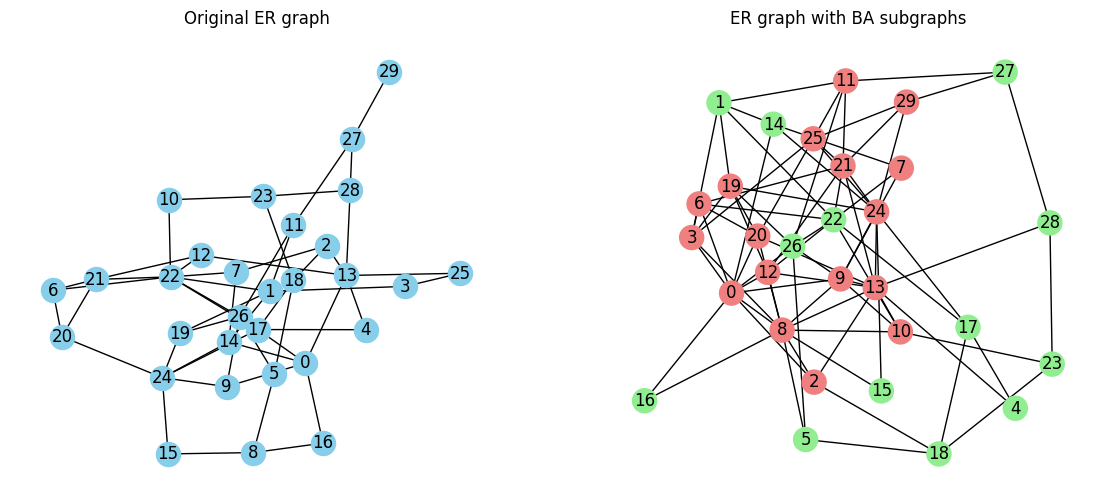

In [49]:
result_adjacency = create_er_replace_with_ba_adjacency(
    n = 30,               # Number of nodes in the ER graph
    p = 0.1,                # Probability of an edge between nodes in ER graph
    m = 3,                  # Number of edges to attach from a new node to existing nodes in BA model
    min_motif_size = 5,     # Minimum number of nodes in a BA model motif
    max_motif_size = 8,    # Maximum number of nodes in a BA model motif
    min_num_motifs = 2,     # Minimum number of motifs to embed
    max_num_motifs = 3,     # Maximum number of motifs to embed
    motif_overlap = False,  # Motif overlap (False for non-overlapping motifs)
    base_edge_weight = 1.0,  # Scalar edge weight for base graph (ER graph)
    motif_edge_weight = 2.0,  # Scalar edge weight for motif graph (BA model)
    plot=True
)

if result_adjacency is not None:
    print("Graph created successfully!")
else:
    print("Graph creation failed.")


Graph created successfully!


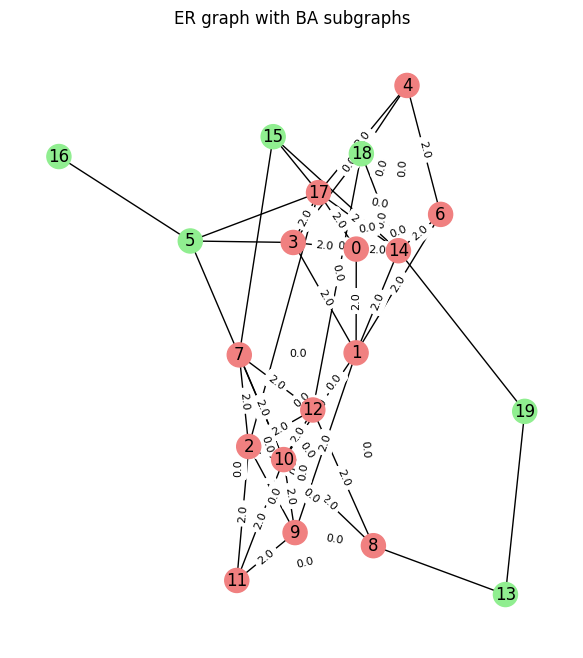

In [52]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def create_er_replace_with_ba_adjacency(n, p, m,
                                        min_motif_size, max_motif_size,
                                        min_num_motifs, max_num_motifs,
                                        motif_overlap=False,
                                        base_edge_weight=1.0,
                                        motif_edge_weight=1.0,
                                        plot=False,
                                        log=True):

    # Create the ER graph adjacency matrix
    er_adjacency = nx.to_numpy_array(nx.erdos_renyi_graph(n, p))
    er_adjacency = er_adjacency * base_edge_weight

    # Ensure that none of the nodes have degree 0 in the original ER graph
    if np.sum(er_adjacency.sum(axis=1) == 0) > 0:
        logging.warning("Original ER graph contains nodes with degree 0.")

    # Create an empty dictionary to store edge labels
    edge_labels = {}

    # Randomly determine the number of motifs to embed
    num_motifs = random.randint(min_num_motifs, max_num_motifs)

    node_colors = ['lightgreen'] * n

    for motif_i in range(num_motifs):
        # Generate a random motif size within the specified range
        ba_n = random.randint(min_motif_size, max_motif_size)

        # Select nodes to replace
        if motif_overlap:
            er_nodes_to_replace = random.sample(range(n), ba_n)
        else:
            er_nodes_to_replace = random.sample(range(n), ba_n)
            n -= ba_n  # Ensure non-overlapping motifs

        for er_node in er_nodes_to_replace:
            node_colors[er_node] = 'lightcoral'

        # Create the BA model adjacency matrix for the motif
        if ba_n >= m:
            ba_motif = nx.to_numpy_array(nx.barabasi_albert_graph(ba_n, m))
            ba_motif = ba_motif * motif_edge_weight
            if np.sum(ba_motif.sum(axis=1) == 0) > 0:
                logging.warning("BA graph contains nodes with degree 0.")

        else:
            logging.warning("BA model requires ba_n >= m")
            return None

        # Replace selected nodes in ER adjacency matrix with BA model motif
        for i, idx in enumerate(er_nodes_to_replace):
            er_adjacency[idx, er_nodes_to_replace] = ba_motif[i]
            # Add edge weight as a label to the edge
            for j, jdx in enumerate(er_nodes_to_replace):
                if i != j:
                    edge_labels[(idx, jdx)] = ba_motif[i, j]

    # Plot ER graph with BA subgraph and edge labels
    if plot:
        plt.figure(figsize=(16, 8))
        plt.subplot(122)
        G = nx.Graph(er_adjacency)
        pos = nx.spring_layout(G)  # Position nodes using a layout algorithm
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=300)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)
        plt.title('ER graph with BA subgraphs')

    return er_adjacency

result_adjacency = create_er_replace_with_ba_adjacency(
    n = 20,               # Number of nodes in the ER graph
    p = 0.1,                # Probability of an edge between nodes in ER graph
    m = 3,                  # Number of edges to attach from a new node to existing nodes in BA model
    min_motif_size = 5,     # Minimum number of nodes in a BA model motif
    max_motif_size = 8,    # Maximum number of nodes in a BA model motif
    min_num_motifs = 2,     # Minimum number of motifs to embed
    max_num_motifs = 3,     # Maximum number of motifs to embed
    motif_overlap = False,  # Motif overlap (False for non-overlapping motifs)
    base_edge_weight = 1.0,  # Scalar edge weight for base graph (ER graph)
    motif_edge_weight = 2.0,  # Scalar edge weight for motif graph (BA model)
    plot=True
)

if result_adjacency is not None:
    print("Graph created successfully!")
else:
    print("Graph creation failed.")
